In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
%matplotlib inline

/Users/chyld/.local/miniconda3/envs/alpha/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
df = pd.read_csv('credit.csv', index_col=0)
df = df[df.Limit > 3500]
df['Student'] = df.Student.map({'No':0, 'Yes':1})
df['Married'] = df.Married.map({'No':0, 'Yes':1})
df['Ethnicity'] = df.Ethnicity.map({'Caucasian':0, 'Asian':1, 'African American':2})
df['Female'] = pd.get_dummies(df.Gender)['Female']
df.drop(['Gender'], axis=1, inplace=True)
df.head(3)

,Income,Limit,Rating,Cards,Age,Education,Student,Married,Ethnicity,Balance,Female
1,14.891,3606,283,2,34,11,0,1,0,333,0
2,106.025,6645,483,3,82,15,1,1,1,903,1
3,104.593,7075,514,4,71,11,0,0,1,580,0


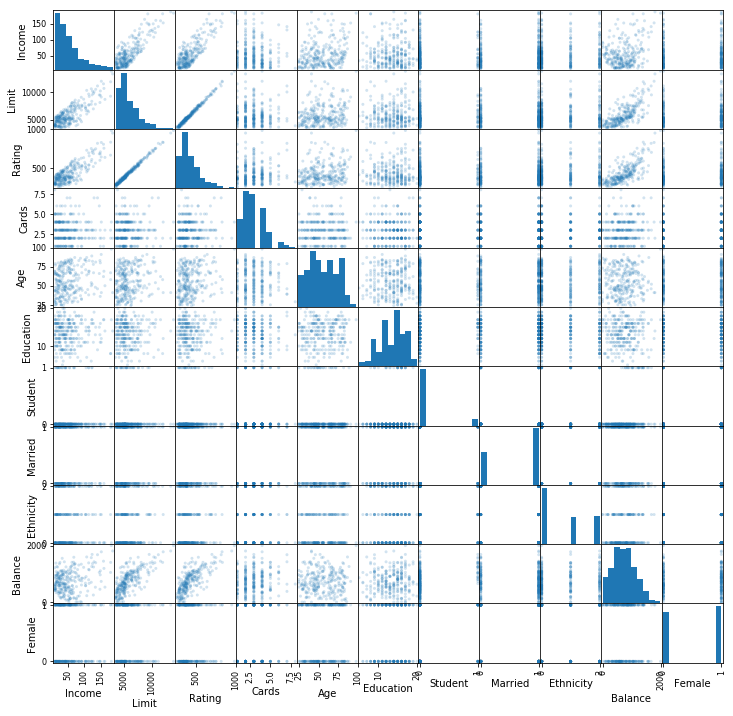

In [3]:
scatter_matrix(df, alpha=0.2, figsize=(12,12))
None

In [6]:
y = df.Balance
X = pd.DataFrame(df, columns=['Rating', 'Income', 'Limit'])

In [7]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     1321.
Date:                Wed, 10 Jan 2018   Prob (F-statistic):          1.31e-158
Time:                        13:56:40   Log-Likelihood:                -1807.6
No. Observations:                 267   AIC:                             3621.
Df Residuals:                     264   BIC:                             3632.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Rating        -4.5399      0.844     -5.381      0.000      -6.201      -2.879
Income        -6.9951      0.534    -13.093      0.000      -8.047      -5.943
Limit          0.5293      0.063      8.345      0.000       0.404       0.654
==============================================================================
Omnibus:                       44.092   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.097
Skew:                           1.075   Prob(JB):                     5.41e-14
Kurtosis:                       3.934   Cond. No.                         419.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""